In [133]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [134]:
def read_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img

img = read_img("./data/11f3bd8.png")

In [189]:
def gaussian_blur(img, kernel_size=11, sigma=5):
    def gaussion_filter(channels):
        kernel_1D = tf.range(-kernel_size // 2 + 1.0, (kernel_size // 2) + 1.0)
        xx, yy = tf.meshgrid(kernel_1D, kernel_1D)
        kernel = tf.exp(-(xx ** 2 + yy ** 2) / (2.0 * sigma ** 2))
        kernel = kernel / tf.reduce_sum(kernel)
        kernel = tf.tile(kernel[..., tf.newaxis], [1, 1, channels])
        return kernel
    
    gaussian_kernel = gaussion_filter(tf.shape(img)[-1])
    return gaussian_kernel[..., tf.newaxis]

In [190]:
kernel = gaussian_blur(img, 3, 3)

In [195]:
image = tf.reshape(img, [1, img.shape[0], img.shape[1], 1], name='image')
conv = tf.nn.conv2d(image, kernel, [1, 1, 8, 1], "SAME")

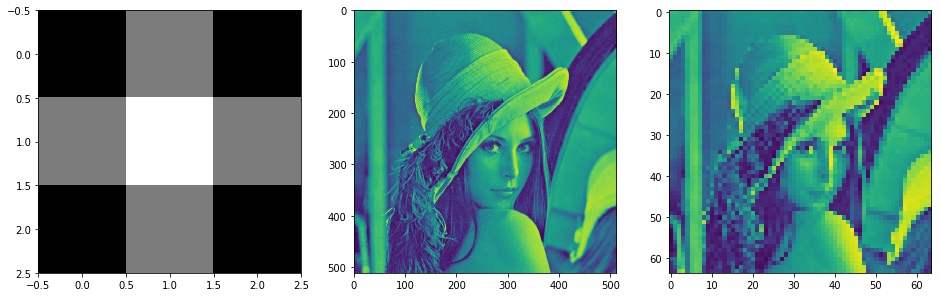

In [196]:
fig, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(tf.reshape(kernel, (kernel.shape[0], kernel.shape[1])), interpolation='none', cmap='gray')
ax[1].imshow(tf.reshape(img, (img.shape[0], img.shape[1])))
ax[2].imshow(tf.reshape(conv[0], (conv.shape[1], conv.shape[2])))